# Inference for the binomial N parameter: A hierarchical Bayes approach

**BY ADRIAN E. RAFTERY**

Treating this article as an exercise. The problem is to estiamte $N$ in the Binomial distribution. Let $(x_1,...,x_n)|N,\theta \overset{iid}{\sim} Bin(N,\theta)$. We first assume that $N \sim Poi(\mu)$. Then,  
$$
(x_1,...,x_n)|\theta \sim Poi(\lambda), 
$$
such that $\lambda = \mu \cdot \theta$. The posterior of $N$ is for $N \ge x_{max}$, 

$$
p(N|x) \propto (N!)^{-1}\left\{\prod_{i=1}^n {N \choose x_i}\right\}\int_0^1 \int_0^{\infty} \theta^{-N+S}(1-\theta)^{nN - S} \lambda^N\exp(-\lambda/\theta)\pi(\lambda, \theta) d\lambda d\theta,
$$

where $S = \sum_{i=1}^n x_i, x_{max} = \max\{x_1,...,x_n\}$ and $\pi(\lambda, \theta)$ is a priori for the parameters. 

In [27]:
import pymc3 as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

## Vague prior knowledge

Consider the improper prior $\pi(\lambda, \theta) \propto \lambda^{-1}$. The posterior will be equivalent to 
$$
p(N|x) \propto \left\{\frac{(nN - S)!}{(nN+1)!N}\right\}\left\{\prod_{i=1}^n {N \choose x_i}\right\}
$$

## Data

Impala herds and individual waterbuck. The observed numbers of impala herds were 15, 20, 21, 23
and 26. The observed numbers of waterbucks were 53, 57, 66, 67 and 72.

In [2]:
impala = np.array([15,20, 21, 23, 26])
waterbucks = np.array([53, 57, 66, 67, 72])

In [58]:
with pm.Model() as model: 
    
    theta = pm.Beta("theta", 1,1)
    lambd = pm.Gamma("lambda", 1,1)
    
    mu = pm.Deterministic("mu", lambd/theta)
    
    BoundPoisson = pm.Bound(pm.Poisson, lower = max(impala))
    N = BoundPoisson("N", mu = mu)
    
    x = pm.Binomial("x", n=N, p=theta, observed=impala)
    prior_checks = pm.sample_prior_predictive(samples=1000)
    trace = pm.sample(4000, tune=4000, nuts={'target_accept':0.99})
    
    display(az.summary(trace))

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [lambda, theta]
>Metropolis: [N]


Sampling 2 chains for 4_000 tune and 4_000 draw iterations (8_000 + 8_000 draws total) took 19 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
N,42.965,15.188,26.000,76.000,2.694,1.923,32.0,32.0,41.0,54.0,1.08
theta,0.505,0.141,0.208,0.722,0.023,0.016,39.0,39.0,44.0,55.0,1.07
lambda,13.577,2.338,9.343,17.985,0.127,0.090,340.0,340.0,347.0,1554.0,1.01
mu,30.526,14.917,12.202,62.056,2.538,1.812,35.0,34.0,46.0,58.0,1.07


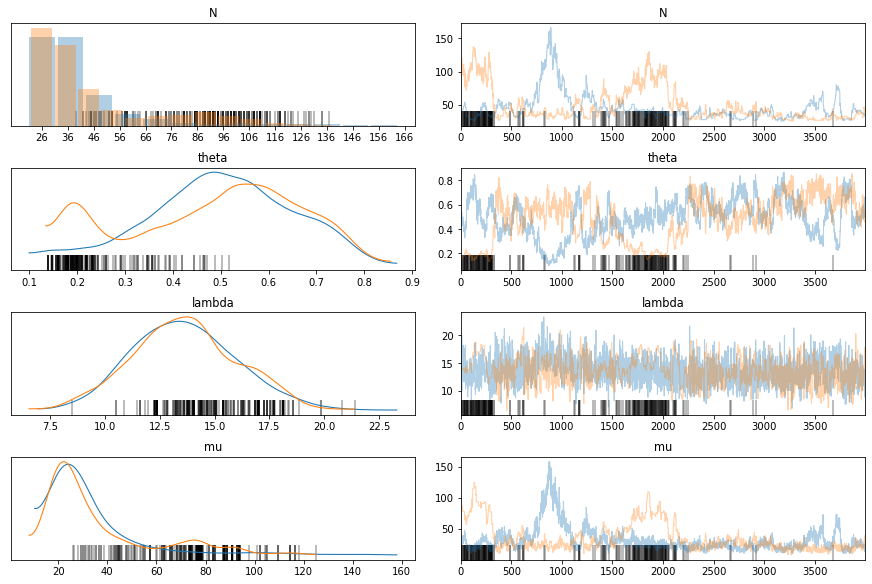

In [56]:
with model: 
    az.plot_trace(trace);

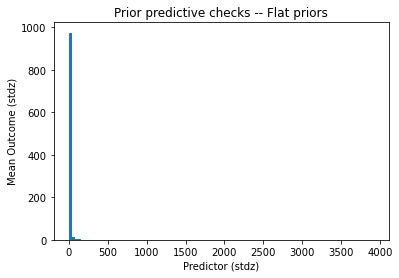

In [59]:
_, ax = plt.subplots()

mu = prior_checks["lambda"]/prior_checks["theta"]
ax.hist(mu, bins = 100)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Mean Outcome (stdz)")
ax.set_title("Prior predictive checks -- Flat priors");

In [60]:
from scipy.stats import beta, gamma

In [64]:
lambd = gamma(1,1).rvs(1000)
theta = beta(1,1).rvs(1000)
mu = lambd/theta

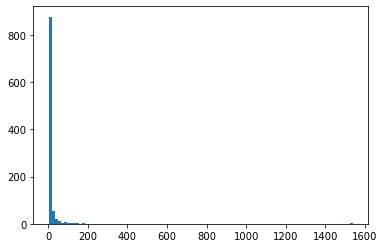

In [67]:
plt.hist(mu, bins = 100)
plt.show()